<a href="https://colab.research.google.com/github/Prakriti-Bhatt/The-Sparks-Foundation-GRIP/blob/main/Task1_GRIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**THE SPARKS FOUNDATION-GRIP**
#**Data Science and Business Analytics Internship**

**Name: PRAKRITI BHATT**

**TASK 1: PREDICTION USING SUPERVISED ML**

**Objective**: To predict the percentage of a student based on the no. of study hours. What will be predicted score if a student studies for 9.25 hrs per day?


**Simple Linear Regression**

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.
This is a simple linear regression task as it involves just two variables.

## **Importing all libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## **Reading data from remote link**

In [ ]:
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")
s_data

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
print("The first 10 student data is displayed")
s_data.head(10)

The first 10 student data is displayed


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
s_data.shape

(25, 2)

In [ ]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# **Data Visualization**

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

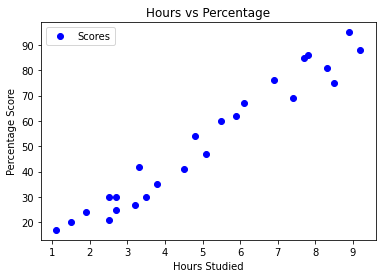

In [ ]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='bo')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

## **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [ ]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

## **Splitting the data**
Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

In [ ]:
print("Shape of x_train =",X_train.shape)
print("Shape of y_train =",y_train.shape)
print("Shape of x_test =",X_test.shape)
print("Shape of y_test =",y_test.shape)

Shape of x_train = (20, 1)
Shape of y_train = (20,)
Shape of x_test = (5, 1)
Shape of y_test = (5,)


## **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [ ]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print(regressor)
print("\nTraining completed successfully!!.")

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Training completed successfully!!.


In [ ]:
print(regressor.coef_)
[9.91065648]

[9.91065648]


[9.91065648]

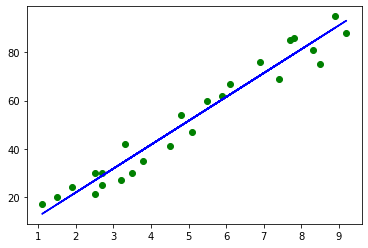

In [ ]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X, y,color='g')
plt.plot(X, line,color='b');
plt.show()


## **Checking the accuracy for train and test set**


Train set Score
0.9515510725211553


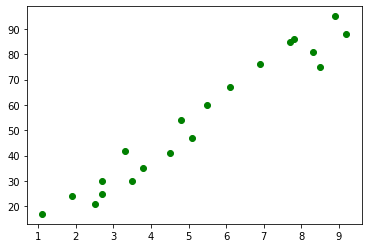

In [ ]:
plt.scatter(X_train,y_train, color='g')
print("Train set Score")
print(regressor.score(X_train,y_train))

Test Score
0.9454906892105354


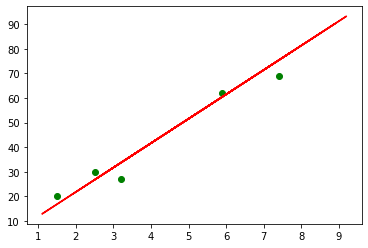

In [ ]:
print("Test Score")
print(regressor.score(X_test,y_test))
plt.scatter(X_test,y_test,color='g')
plt.plot(X_train,regressor.predict(X_train),color='r')

## **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions. In order to compare the predictions with the already loaded data we have divided the data into train and test set.

In [ ]:
print(X_test) # Testing data - In Hours

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
y_pred = regressor.predict(X_test) # Predicting the scores
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## **Predicting the scores for 9.25 hours**

In [ ]:
# You can also test with your own data
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


## **Evaluating the model**
The final step is to evaluate the performance of the algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity,we have chosen the mean square error.

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982


# **THANK YOU**